In [5]:
import numpy as np
# import matplotlib.plotly as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd

#o check accuracy
from sklearn.metrics import accuracy_score
# to check accuracy
from sklearn.metrics import *
import pickle 
#visualization in 3D
from mpl_toolkits.mplot3d import Axes3D
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import os, sys
import csv

In [6]:
# Cross Validation

# load dataset
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Dataset has 2433 rows and 2 Columns



 Accuracy train by acc_r2 84.03953977081281

 Accuracy train by median_ab_error 98.92909413551223


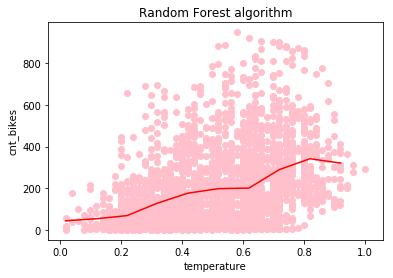

In [7]:
class Cross_validation():
           
    def y_prediction(self,regression, x_train):
        # predicting the test set result
        return regression.predict(x_train)
    
    def accuracy(self,y_predict_train,y_train):
        # acc using r2
        error = r2_score(y_train, y_predict_train)      
        acc_r2 = (1-error)*100
        
        # using median_ab_error
        median_ab_error = median_absolute_error(y_train, y_predict_train)
        return acc_r2, median_ab_error
    
    def visualization(self,x_train,y_train, regression):
        
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
        
        x_grid = np.arange(min(x_train), max(x_train), 0.1)
        x_grid = x_grid.reshape((len(x_grid),1))
        
        plt.scatter(x_train,y_train, color = 'pink')

        # reshape x_grid or not both will give same ploting
        
        plt.plot(x_grid,regression.predict(x_grid.reshape(-1,1)), color = 'red')
        plt.title("Random Forest algorithm")
        plt.xlabel("temperature")
        plt.ylabel("cnt_bikes")
        plt.show()
        

def main():
    #class obj created
    obj  = Cross_validation()
    
    # seperate fetures and label
    x_cv = CV_dataset.iloc[:,:-1].values
    y_cv = CV_dataset.iloc[:,1].values
 
    
    #cross validation
    file1 = open('RandomForestModule.pkl', 'rb')
    reg1 = pickle.load(file1)
    
    # y_prediction ( cross validation)   
    y_cv_pre = obj.y_prediction(reg1, x_cv)
    
    
    acc_r2, median_ab_error= obj.accuracy(y_cv_pre,y_cv)
    print("\n Accuracy train by acc_r2", acc_r2)
    print("\n Accuracy train by median_ab_error", median_ab_error)

    obj.visualization(x_cv, y_cv, reg1)

if __name__ == '__main__':
    main()
